<a href="https://colab.research.google.com/github/ik-ingkarat/229352-StatisticalLearning/blob/main/Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [2]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("/content/heart_disease - heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [4]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [5]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

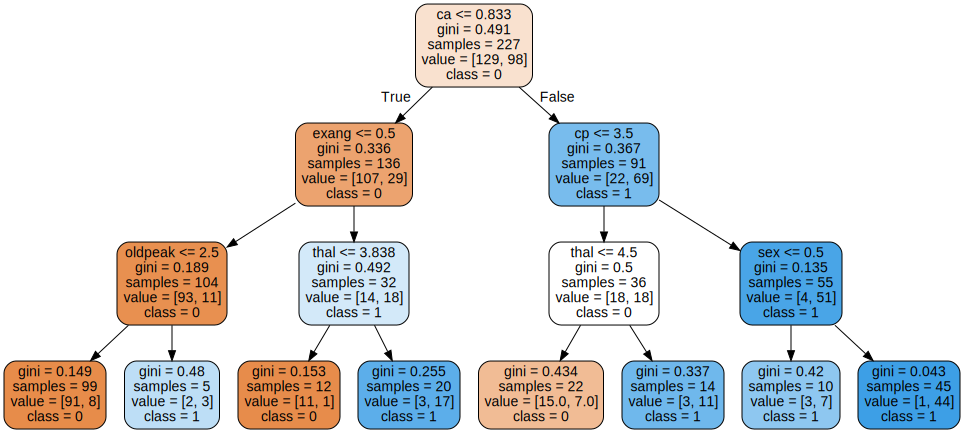

In [6]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [8]:
clf = DecisionTreeClassifier()
bagging = BaggingClassifier(clf)
bagging.fit(X_train, y_train)
score = bagging.score(X_test, y_test)
score

0.7894736842105263

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [10]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_score = rf_clf.score(X_test, y_test)
print(rf_score)

0.7763157894736842


#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

# Decision Tree
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('dt', DecisionTreeClassifier())
])

dt_params = {
    'dt__max_depth': [3, 5, 7, 10],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
    'dt__criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(dt_pipeline, dt_params, scoring='accuracy', cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
dt_test_pred = best_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_test_pred)
dt_f1 = f1_score(y_test, dt_test_pred, average='macro')

print("--- Decision Tree ---")
print(f"Best parameters: {dt_grid.best_params_}")
print(f"Test Accuracy: {dt_accuracy}")
print(f"Test F1 (macro): {dt_f1}")
print("-" * 20)


# Bagged Decision Trees
bagging_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('bagging', BaggingClassifier(DecisionTreeClassifier()))
])

bagging_params = {
    'bagging__n_estimators': [10, 50, 100, 200],
    'bagging__max_samples': [0.5, 0.8, 1.0],
    'bagging__max_features': [0.5, 0.8, 1.0],
    'bagging__estimator__max_depth': [3, 5, 7]
}

bagging_grid = GridSearchCV(bagging_pipeline, bagging_params, scoring='accuracy', cv=5)
bagging_grid.fit(X_train, y_train)
best_bagging = bagging_grid.best_estimator_
bagging_test_pred = best_bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_test_pred)
bagging_f1 = f1_score(y_test, bagging_test_pred, average='macro')

print("--- Bagged Decision Trees ---")
print(f"Best parameters: {bagging_grid.best_params_}")
print(f"Test Accuracy: {bagging_accuracy}")
print(f"Test F1 (macro): {bagging_f1}")
print("-" * 20)


# Random Forest
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('rf', RandomForestClassifier())
])

rf_params = {
    'rf__n_estimators': [50, 100, 200, 300],
    'rf__max_depth': [5, 10, 15, None],
    'rf__criterion': ['gini', 'entropy']
}

rf_grid = GridSearchCV(rf_pipeline, rf_params, scoring='accuracy', cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_test_pred = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_test_pred)
rf_f1 = f1_score(y_test, rf_test_pred, average='macro')

print("--- Random Forest ---")
print(f"Best parameters: {rf_grid.best_params_}")
print(f"Test Accuracy: {rf_accuracy}")
print(f"Test F1 (macro): {rf_f1}")
print("-" * 20)

--- Decision Tree ---
Best parameters: {'dt__criterion': 'gini', 'dt__max_depth': 3, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 2}
Test Accuracy: 0.7763157894736842
Test F1 (macro): 0.7762770562770562
--------------------
--- Bagged Decision Trees ---
Best parameters: {'bagging__estimator__max_depth': 3, 'bagging__max_features': 0.5, 'bagging__max_samples': 1.0, 'bagging__n_estimators': 100}
Test Accuracy: 0.7763157894736842
Test F1 (macro): 0.7753434185359067
--------------------
--- Random Forest ---
Best parameters: {'rf__criterion': 'gini', 'rf__max_depth': 5, 'rf__n_estimators': 200}
Test Accuracy: 0.7631578947368421
Test F1 (macro): 0.7629937629937631
--------------------


--- Best Model ---
Model: Decision Tree
Test Accuracy: 0.7763157894736842
Best Parameters: {'dt__criterion': 'gini', 'dt__max_depth': 3, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 2}
--------------------


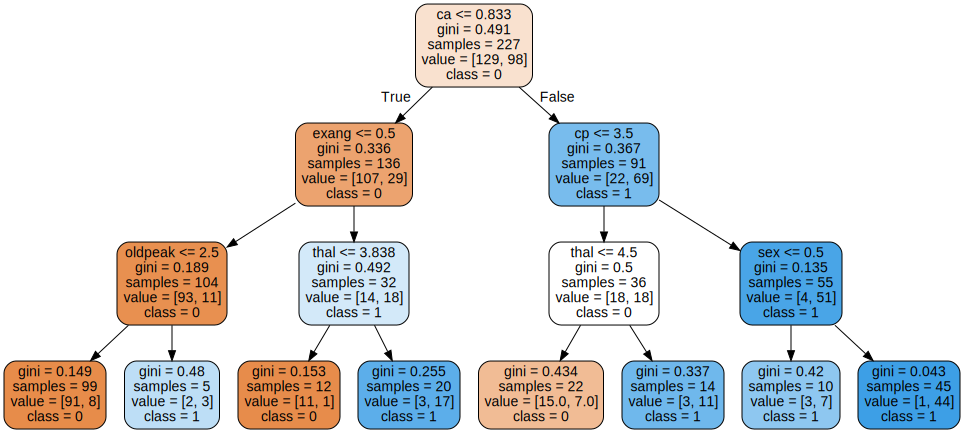

In [15]:
best_model = max([(dt_accuracy, 'Decision Tree', dt_grid.best_params_, best_dt),
                  (bagging_accuracy, 'Bagged Decision Trees', bagging_grid.best_params_, best_bagging),
                  (rf_accuracy, 'Random Forest', rf_grid.best_params_, best_rf)], key=lambda item: item[0])

print(f"--- Best Model ---")
print(f"Model: {best_model[1]}")
print(f"Test Accuracy: {best_model[0]}")
print(f"Best Parameters: {best_model[2]}")
print("-" * 20)

# Plot the best Decision Tree model
if best_model[1] == 'Decision Tree':
    from sklearn.tree import export_graphviz
    import graphviz

    plot_data = export_graphviz(best_model[3].named_steps['dt'],
                                out_file=None,
                                filled=True,
                                rounded=True,
                                feature_names=data.columns[:-1],
                                class_names=['0', '1'])

    graph = graphviz.Source(plot_data)
    display(graph)
elif best_model[1] == 'Bagged Decision Trees' and isinstance(best_model[3].named_steps['bagging'].estimator, DecisionTreeClassifier):
     from sklearn.tree import export_graphviz
     import graphviz

     # Export the first tree in the bagged ensemble
     plot_data = export_graphviz(best_model[3].named_steps['bagging'].estimators_[0],
                                out_file=None,
                                filled=True,
                                rounded=True,
                                feature_names=data.columns[:-1],
                                class_names=['0', '1'])

     graph = graphviz.Source(plot_data)
     display(graph)